In [25]:
# similar dist
import numpy as np

diffs20 = np.load('./costs_d/sd_diffs_q20.npy', allow_pickle=True)
diffs30 = np.load('./costs_d/sd_diffs_q30.npy', allow_pickle=True)
diffs40 = np.load('./costs_d/sd_diffs_q40.npy', allow_pickle=True)
diffs_mse = np.load('./costs_d/sd_diffs_mse.npy', allow_pickle=True)

print("==== Similar group ====\n")
print("--- Cost Regret Variance. Testing Results ---")
print(f"Equitable PM, q+1=20: {np.var(diffs20):.6f}")
print(f"Equitable PM, q+1=30: {np.var(diffs30):.6f}")
print(f"Equitable PM, q+1=40: {np.var(diffs40):.6f}\n")

print(f"Plain PM: {np.var(diffs_mse):.6f}\n")

print("--- Cost Regret Mean. Testing Results ---")
print(f"Equitable PM, q+1=20: {np.mean(diffs20):.6f}")
print(f"Equitable PM, q+1=30: {np.mean(diffs30):.6f}")
print(f"Equitable PM, q+1=40: {np.mean(diffs40):.6f}\n")

print(f"Plain PM: {np.mean(diffs_mse):.6f}\n")

print("--- Cost Regret Quantile (C95 - C5). Testing Results ---")
print(f"Equitable PM, q+1=20: {np.percentile(diffs20, 95) - np.percentile(diffs20, 5):.6f}")
print(f"Equitable PM, q+1=30: {np.percentile(diffs30, 95) - np.percentile(diffs30, 5):.6f}")
print(f"Equitable PM, q+1=40: {np.percentile(diffs40, 95) - np.percentile(diffs40, 5):.6f}\n")
print(f"Plain PM: {np.percentile(diffs_mse, 95) - np.percentile(diffs_mse, 5):.6f}")




==== Similar group ====

--- Cost Regret Variance. Testing Results ---
Equitable PM, q+1=20: 0.024669
Equitable PM, q+1=30: 0.021561
Equitable PM, q+1=40: 0.019384

Plain PM: 0.026214

--- Cost Regret Mean. Testing Results ---
Equitable PM, q+1=20: 2.516416
Equitable PM, q+1=30: 2.355925
Equitable PM, q+1=40: 2.237129

Plain PM: 2.610248

--- Cost Regret Quantile (C95 - C5). Testing Results ---
Equitable PM, q+1=20: 0.495014
Equitable PM, q+1=30: 0.462744
Equitable PM, q+1=40: 0.438813

Plain PM: 0.510164


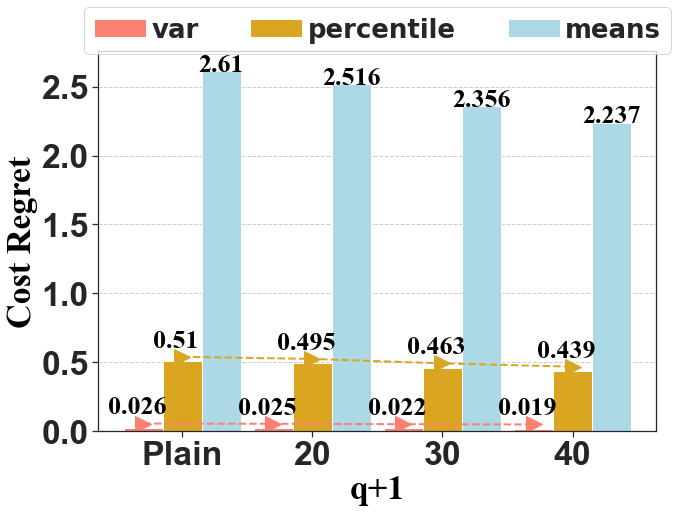

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



X = ['Plain', '20','30','40']
var = [np.var(diffs_mse), np.var(diffs20), np.var(diffs30), np.var(diffs40)]
means = [np.mean(diffs_mse), np.mean(diffs20), np.mean(diffs30), np.mean(diffs40)]
percentile= [np.percentile(diffs_mse, 95) - np.percentile(diffs_mse, 5), np.percentile(diffs20, 95) - np.percentile(diffs20, 5), 
             np.percentile(diffs30, 95) - np.percentile(diffs30, 5), np.percentile(diffs40, 95) - np.percentile(diffs40, 5)]

X_axis = np.arange(len(X))

font = {'family': 'Times New Roman',
        'color':  'black',
        'size': 34,
         'weight': 'bold',
        }
txtfont = {'family': 'Times New Roman',
        'color':  'black',
        'size': 26,
         'weight': 'bold',
        }
f, ax = plt.subplots(1, 1, figsize=(10, 7), edgecolor='black')
plt.grid(axis='y', linestyle='--')

plt.bar(X_axis - 0.3, var, 0.3, label = 'var', color='salmon')
for i, v in enumerate(var):
    plt.text(X_axis[i] - 0.35, v + 0.1, str(np.round(v, decimals=3)), color='black', ha='center', fontdict=txtfont)

plt.bar(X_axis , percentile, 0.3, label = 'percentile', color='goldenrod')
for i, p in enumerate(percentile):
    plt.text(X_axis[i]-0.05, p + 0.1, str(np.round(p, decimals=3)), color='black', ha='center', fontdict=txtfont)

plt.bar(X_axis + 0.3, means, 0.3, label = 'means', color='lightblue')
for i, m in enumerate(means):
    plt.text(X_axis[i]+0.3, m , str(np.round(m, decimals=3)), color='black', ha='center', fontdict=txtfont)

plt.plot(X_axis - 0.3, [v+0.03 for v in var], '--', linewidth=2, markersize=16, color='salmon', marker='>')
plt.plot(X_axis, [p+0.03 for p in percentile], '--', linewidth=2, markersize=16, color='goldenrod', marker='>')

plt.ylim(0, 2.76)
plt.yticks(fontsize=34, fontweight='bold')
plt.xticks(X_axis, X, fontsize=34, fontweight='bold')
plt.xlabel("q+1", fontdict=font)
plt.ylabel("Cost Regret", fontdict=font)

plt.legend(loc='upper left', prop={'family':"DejaVu Sans", 'size':26, 'weight': 'bold'}, handletextpad=0.2, frameon=True,  ncol=3, bbox_to_anchor=(-0.05, 1.15))


plt.show()


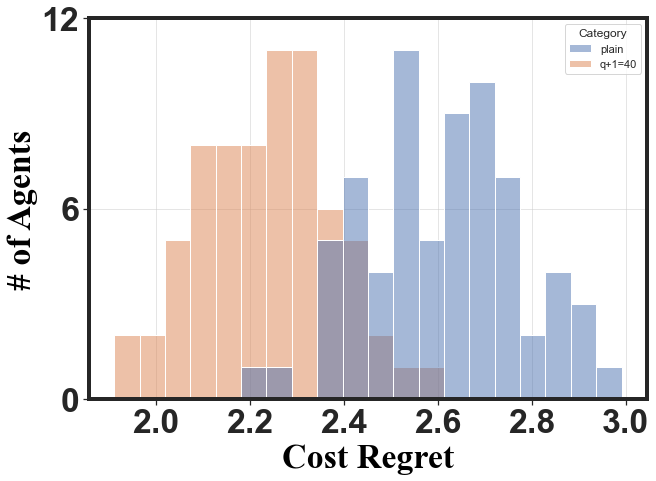

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create DataFrame from dictionary
data = {
    "plain": diffs_mse,
    "q+1=40": diffs40
}

df_res = pd.DataFrame(data)

# Melt DataFrame to long format for seaborn
df_res_melted = df_res.melt(var_name='Category', value_name='Value')

# Set seaborn theme
sns.set_theme(style="ticks")

# Create plot
f, ax = plt.subplots(1, figsize=(10, 7))

# Plot data with seaborn
sns.histplot(
    data=df_res_melted,
    x="Value",
    hue="Category",
    hue_order=["plain", "q+1=40"],
    bins=20,
    line_kws={"lw": 5}
)

font = {'family': 'Times New Roman',
        'color':  'black',
        'size': 34,
         'weight': 'bold',
        }


# Customize the font
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)

# Customize ticks and labels
plt.yticks(fontsize=34, fontweight='bold')
plt.xticks(fontsize=34, fontweight='bold')
ax.set_yticks([0,6, 12])
ax.set_ylim([0, 12])
ax.set_xlabel("Cost Regret", fontweight='bold', fontdict=font)
ax.set_ylabel("# of Agents", fontweight='bold', fontdict=font)

# Add grid
plt.grid(True, alpha=0.5)

plt.show()


In [28]:
# different dist
import numpy as np

diffs20 = np.load('./costs_d/dd_diffs_q20.npy', allow_pickle=True)
diffs30 = np.load('./costs_d/dd_diffs_q30.npy', allow_pickle=True)
diffs40 = np.load('./costs_d/dd_diffs_q40.npy', allow_pickle=True)
diffs_mse = np.load('./costs_d/dd_diffs_mse.npy', allow_pickle=True)

print("==== Different group ====\n")
print("--- Cost Regret Variance. Testing Results ---")
print(f"Equitable PM, q+1=20: {np.var(diffs20):.6f}")
print(f"Equitable PM, q+1=30: {np.var(diffs30):.6f}")
print(f"Equitable PM, q+1=40: {np.var(diffs40):.6f}\n")

print(f"Plain PM: {np.var(diffs_mse):.6f}\n")

print("--- Cost Regret Mean. Testing Results ---")
print(f"Equitable PM, q+1=20: {np.mean(diffs20):.6f}")
print(f"Equitable PM, q+1=30: {np.mean(diffs30):.6f}")
print(f"Equitable PM, q+1=40: {np.mean(diffs40):.6f}\n")

print(f"Plain PM: {np.mean(diffs_mse):.6f}\n")

print("--- Cost Regret Quantile (C95 - C5). Testing Results ---")
print(f"Equitable PM, q+1=20: {np.percentile(diffs20, 95) - np.percentile(diffs20, 5):.6f}")
print(f"Equitable PM, q+1=30: {np.percentile(diffs30, 95) - np.percentile(diffs30, 5):.6f}")
print(f"Equitable PM, q+1=40: {np.percentile(diffs40, 95) - np.percentile(diffs40, 5):.6f}\n")
print(f"Plain PM: {np.percentile(diffs_mse, 95) - np.percentile(diffs_mse, 5):.6f}")




==== Different group ====

--- Cost Regret Variance. Testing Results ---
Equitable PM, q+1=20: 0.644506
Equitable PM, q+1=30: 0.640261
Equitable PM, q+1=40: 0.374234

Plain PM: 0.841152

--- Cost Regret Mean. Testing Results ---
Equitable PM, q+1=20: 2.517051
Equitable PM, q+1=30: 2.415856
Equitable PM, q+1=40: 1.930148

Plain PM: 2.783657

--- Cost Regret Quantile (C95 - C5). Testing Results ---
Equitable PM, q+1=20: 2.095863
Equitable PM, q+1=30: 2.088955
Equitable PM, q+1=40: 1.597089

Plain PM: 2.394282


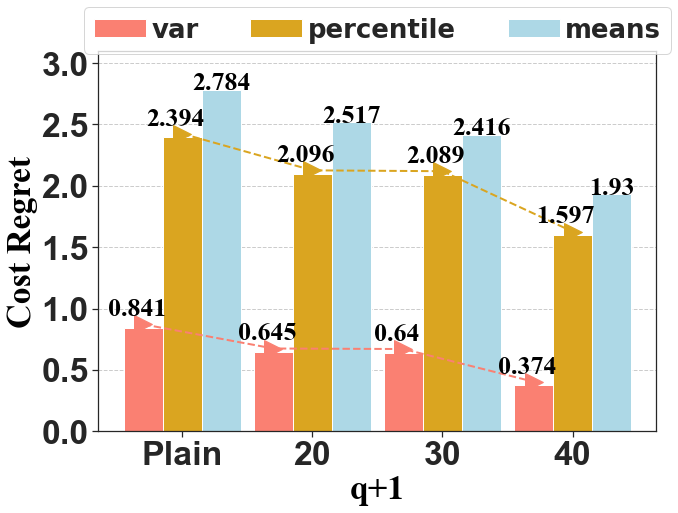

In [29]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = ['Plain', '20','30','40']
var = [np.var(diffs_mse), np.var(diffs20), np.var(diffs30), np.var(diffs40)]
means = [np.mean(diffs_mse), np.mean(diffs20), np.mean(diffs30), np.mean(diffs40)]
percentile= [np.percentile(diffs_mse, 95) - np.percentile(diffs_mse, 5), np.percentile(diffs20, 95) - np.percentile(diffs20, 5), 
             np.percentile(diffs30, 95) - np.percentile(diffs30, 5), np.percentile(diffs40, 95) - np.percentile(diffs40, 5)]

X_axis = np.arange(len(X))

font = {'family': 'Times New Roman',
        'color':  'black',
        'size': 34,
         'weight': 'bold',
        }

f, ax = plt.subplots(1, 1, figsize=(10, 7), edgecolor='black')
plt.grid(axis='y', linestyle='--')

plt.bar(X_axis - 0.3, var, 0.3, label = 'var', color='salmon')
for i, v in enumerate(var):
    plt.text(X_axis[i] - 0.35, v + 0.1, str(np.round(v, decimals=3)), color='black', ha='center', fontdict=txtfont)

plt.bar(X_axis , percentile, 0.3, label = 'percentile', color='goldenrod')
for i, p in enumerate(percentile):
    plt.text(X_axis[i]-0.05, p + 0.1, str(np.round(p, decimals=3)), color='black', ha='center', fontdict=txtfont)

plt.bar(X_axis + 0.3, means, 0.3, label = 'means', color='lightblue')
for i, m in enumerate(means):
    plt.text(X_axis[i]+0.3, m, str(np.round(m, decimals=3)), color='black', ha='center', fontdict=txtfont)


plt.plot(X_axis - 0.3, [v+0.03 for v in var], '--', linewidth=2, markersize=18, color='salmon', marker='>')
plt.plot(X_axis, [p+0.03 for p in percentile], '--', linewidth=2, markersize=18, color='goldenrod', marker='>')


plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)
plt.yticks(fontsize=34, fontweight='bold')
plt.xticks(X_axis, X, fontsize=34, fontweight='bold')
plt.xlabel("q+1", fontdict=font)
plt.ylabel("Cost Regret", fontdict=font)
plt.ylim((0, 3.1))
plt.legend(loc='upper left', prop={'family':"DejaVu Sans", 'size':26, 'weight': 'bold'}, handletextpad=0.2, frameon=True,  ncol=3, bbox_to_anchor=(-0.05, 1.15))


plt.show()


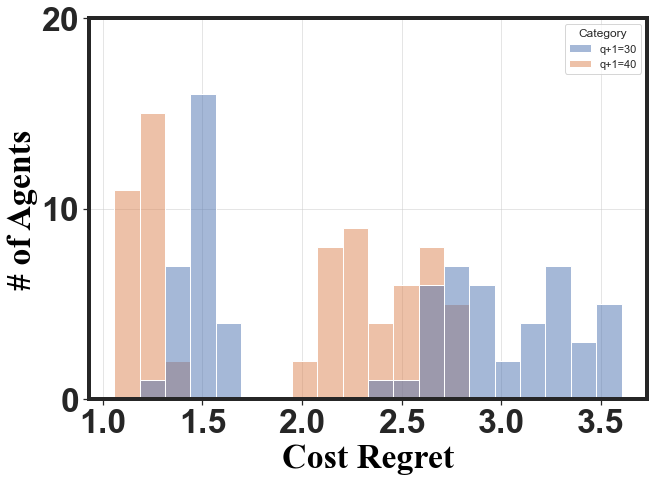

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create DataFrame from dictionary
data = {
    "q+1=30": diffs30,
    "q+1=40": diffs40
}

df_res = pd.DataFrame(data)

# Melt DataFrame to long format for seaborn
df_res_melted = df_res.melt(var_name='Category', value_name='Value')

# Set seaborn theme
sns.set_theme(style="ticks")

# Create plot
f, ax = plt.subplots(1, figsize=(10, 7))

# Plot data with seaborn
sns.histplot(
    data=df_res_melted,
    x="Value",
    hue="Category",
    hue_order=["q+1=30", "q+1=40"],
    bins=20,
    line_kws={"lw": 5}
)

font = {'family': 'Times New Roman',
        'color':  'black',
        'size': 34,
         'weight': 'bold',
        }


# Customize the font
ax.spines['bottom'].set_linewidth(4)
ax.spines['left'].set_linewidth(4)
ax.spines['right'].set_linewidth(4)
ax.spines['top'].set_linewidth(4)

# Customize ticks and labels
plt.yticks(fontsize=34, fontweight='bold')
plt.xticks(fontsize=34, fontweight='bold')
ax.set_yticks([0,10, 20])
ax.set_ylim([0, 20])
# ax.set_xlim([0, 0.09])
ax.set_xlabel("Cost Regret", fontweight='bold', fontdict=font)
ax.set_ylabel("# of Agents", fontweight='bold', fontdict=font)

# Add grid
plt.grid(True, alpha=0.5)


# Save or show the plot
plt.show()
